## "Euphotic zone residence time of Antarctic Bottom Water"

### Code for Figure 2 (a) stastics and (b) Heatmap
Figure 2. (a) the fraction of particles identified as AABW with zero and non-zero euphotic zone residence time.

Figure 2. (b) Heatmap shows where residence time predominantly occurs. It only shows euphotic zone residence location of particles that remained in the surface for ≥4 weeks. 

Figure 1. Probability density (%) maps of particles that spend time in the euphotic zone.

One unadopted plot for the time series of how many days particles identified as AABW were in the consecutive euphotic zone residence in every month is also attached.

Corresponding to Yinghuan Xie (yinghuan.xie@utas.edu.au)

In [1]:
# Importing the relevant modules. 
import numpy as np
import xarray as xr
import os
import re
from glob import glob
import netCDF4 as nc
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import cosima_cookbook as cc
session =cc.database.create_session()
expt = '01deg_jra55v13_ryf9091'
from os import sys
sys.path.append('/home/581/yx9454/PhD_Ch1')
from My_Py_Func import Ch1_defs as c1d
#
import time
import datetime as dt
from datetime import timedelta

### Load PARZ_mask files

In [4]:
%%time
exp_name = 'MLS_ON'
var_in_arrs_0,var_in_arrs_1,var_in_arrs_2,var_in_arrs_3,var_in_arrs_4 = {},{},{},{},{}
# Load traj files 0
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_0_PARZ_mask.npz',allow_pickle=True)
var_in_arrs_0['PARZ_mask']   =npzfile['PARZ_mask']

# Load traj files 1
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_1_PARZ_mask.npz',allow_pickle=True)
var_in_arrs_1['PARZ_mask']   =npzfile['PARZ_mask']

# Load traj files 2
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_2_PARZ_mask.npz',allow_pickle=True)
var_in_arrs_2['PARZ_mask']   =npzfile['PARZ_mask']

# Load traj files 3
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_3_PARZ_mask.npz',allow_pickle=True)
var_in_arrs_3['PARZ_mask']   =npzfile['PARZ_mask']

# Load traj files 3
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_4_PARZ_mask.npz',allow_pickle=True)
var_in_arrs_4['PARZ_mask']   =npzfile['PARZ_mask']

CPU times: user 51.9 s, sys: 45.5 s, total: 1min 37s
Wall time: 1min 38s


## Load position files and indexes for selected particles

In [5]:
%%time

# Load traj files 0
# From 5days freq npz file

# Load traj files 0
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_0.npz')
var_in_arrs_0['x']   =npzfile['x']
var_in_arrs_0['y']   =npzfile['y']

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_0_CS_Eu_date.npz')
var_in_arrs_0['CS_Eu_date']=npzfile['CS_Eu_date']

# Load traj files 1
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_1.npz')
var_in_arrs_1['x']   =npzfile['x']
var_in_arrs_1['y']   =npzfile['y']

# Load traj files 2
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_2_5days_freq.npz')
var_in_arrs_2['x']   =npzfile['x']
var_in_arrs_2['y']   =npzfile['y']

# Load traj files 3
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_3_5days_freq.npz')
var_in_arrs_3['x']   =npzfile['x']
var_in_arrs_3['y']   =npzfile['y']

# Load traj files 4
# From 5days freq npz file
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_4_5days_freq.npz')
var_in_arrs_4['x']   =npzfile['x']
var_in_arrs_4['y']   =npzfile['y']

CPU times: user 1min 8s, sys: 37.5 s, total: 1min 45s
Wall time: 1min 45s


In [6]:
AABW_inds = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/AABW_inds.npz')['AABW_inds']
stopsign_list = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/stopsign_list_for_20yrs_150m_thre.npz')['stopsign_list']
CDW_inds = ~(np.isnan(stopsign_list))
AABW_shallower_than_EZD_plus_CDW =  (var_in_arrs_0['CS_Eu_date'][:,-1]>0) & (CDW_inds)

print('AABW: ',sum(AABW_inds))
print('AABW_CDW: ',sum(CDW_inds))
print('AABW&EZD: ',sum(var_in_arrs_0['CS_Eu_date'][:,-1]>0))
print('AABW&cdw&EZD: ',sum(AABW_shallower_than_EZD_plus_CDW))

AABW:  94123
AABW_CDW:  88809
AABW&EZD:  30950
AABW&cdw&EZD:  26733


## Load required 'PARZ_mask' array, which record the consecutive duration for each euphotic zone residence period

In [7]:
ind_here = CDW_inds

PARZ_mask_4 = var_in_arrs_4['PARZ_mask'][ind_here]
PARZ_mask_3 = var_in_arrs_3['PARZ_mask'][ind_here]
PARZ_mask_2 = var_in_arrs_2['PARZ_mask'][ind_here]
PARZ_mask_1 = var_in_arrs_1['PARZ_mask'][ind_here]
PARZ_mask_0 = var_in_arrs_0['PARZ_mask'][ind_here]


# Statistics in Figure 2 (a)
## Then test how many AABW+CDW particles have constructive residence for assigned thresholds 

In [8]:
%%time
max_consecutive_duration = np.nanmax(
    np.array((np.nanmax(PARZ_mask_0,axis=1),np.nanmax(PARZ_mask_1,axis=1),np.nanmax(PARZ_mask_2,axis=1),np.nanmax(PARZ_mask_3,axis=1),np.nanmax(PARZ_mask_4,axis=1)))
    ,axis=0)

print('AABW+CDW pts:',sum(CDW_inds))
for Threshold in [0,7,14,21,28,56,112]: # in days here
    num = sum(max_consecutive_duration>=Threshold*4)
    print('Consecutive days: ',Threshold)
    print('AABW+CDW: satisfied ',num,' , in precentage: ',100*num/sum(CDW_inds))

AABW+CDW pts: 88809
Consecutive days:  0
AABW+CDW: satisfied  26733  , in precentage:  30.101678883896902
Consecutive days:  7
AABW+CDW: satisfied  16042  , in precentage:  18.063484556745376
Consecutive days:  14
AABW+CDW: satisfied  9942  , in precentage:  11.194811336688849
Consecutive days:  21
AABW+CDW: satisfied  6016  , in precentage:  6.774088211780337
Consecutive days:  28
AABW+CDW: satisfied  3670  , in precentage:  4.132464052066795
Consecutive days:  56
AABW+CDW: satisfied  453  , in precentage:  0.5100834374894436
Consecutive days:  112
AABW+CDW: satisfied  6  , in precentage:  0.00675607201972773
CPU times: user 6.48 s, sys: 5.92 ms, total: 6.49 s
Wall time: 6.48 s


# Figure 2 (b). Visualize the location of consecutive euphotic zone residence as heatmap

In [9]:
def shelf_mask_isobath(var):
    '''
    Masks ACCESS-OM2-01 variables by the region polewards of the 1000m isobath as computed using
    a script contributed by Adele Morrison.
    Only to be used with ACCESS-OM2-0.1 output!
    '''
    contour_file = np.load('/g/data/ik11/grids/Antarctic_slope_contour_1000m.npz')

    shelf_mask = contour_file['contour_masked_above']
    yt_ocean = contour_file['yt_ocean']
    xt_ocean = contour_file['xt_ocean']

    # in this file the points along the isobath are given a positive value, the points outside (northwards)
    # of the isobath are given a value of -100 and all the points on the continental shelf have a value of 0
    # so we mask for the 0 values
    shelf_mask[np.where(shelf_mask!=0)] = np.nan
    shelf_mask = shelf_mask+1
    shelf_map = np.nan_to_num(shelf_mask)
    shelf_mask = xr.DataArray(shelf_mask, coords = [('yt_ocean', yt_ocean), ('xt_ocean', xt_ocean)])
    shelf_map = xr.DataArray(shelf_map, coords = [('yt_ocean', yt_ocean), ('xt_ocean', xt_ocean)])

    # then we want to multiply the variable with the mask so we need to account for the shape of the mask.
    # The mask uses a northern cutoff of 59S.
    masked_var = var.sel(yt_ocean = slice(-90, -59.03)) * shelf_mask
    return masked_var, shelf_map

xt_ocean,yt_ocean,yt_extend,ocean_depth,ocean_depth_extend = c1d.Load_Grid_Data(False)
# Grid inherited from CC Code
ht = cc.querying.getvar(expt,'ht', session, n=1)
ht = ht.sel(yt_ocean = slice(-90, -59))
land_mask = (ht*0).fillna(1)
yt_ocean_cc = ht.yt_ocean.values
xt_ocean_cc = ht.xt_ocean.values
ht_shelf , shelf_mask = shelf_mask_isobath(ht)
ht_all = cc.querying.getvar(expt,'ht', session, n=1)

In [10]:
def PDF3D_num_only(x,y,z,res,z_edge,npts):
  x_here = x.flatten()
  y_here = y.flatten()
  z_here = z.flatten()
  #p_here = psigma2.flatten()

  if res==0.1:
    x_edges,y_edges = np.arange(0,360.1,0.1),np.arange(-80,-29.9,0.1)
    Three_dim_PDF,edges = np.histogramdd((x_here,y_here,z_here),(x_edges,y_edges,z_edge))
    #Three_dim_PDF = (Three_dim_PDF/npts)*100
    #
    boxcenter = [edges[0][:-1]+(0.5*abs(edges[0][0]-edges[0][1])),
                 edges[1][:-1]+(0.5*abs(edges[1][0]-edges[1][1])),
                 edges[2][:-1]+(0.5*abs(edges[2][0]-edges[2][1]))]
    X,Y = np.meshgrid(boxcenter[0], boxcenter[1])
    print('RES=0.1 deg')

  elif res==1:
    x_edges,y_edges = np.arange(0,361,1),np.arange(-80,-29,1)
    Three_dim_PDF,edges = np.histogramdd((x_here,y_here,z_here),(x_edges,y_edges,z_edge))
    Three_dim_PDF = (Three_dim_PDF/npts)*100
    #
    boxcenter = [edges[0][:-1]+(0.5*abs(edges[0][0]-edges[0][1])),
                 edges[1][:-1]+(0.5*abs(edges[1][0]-edges[1][1])),
                 edges[2][:-1]+(0.5*abs(edges[2][0]-edges[2][1]))]
    X,Y = np.meshgrid(boxcenter[0], boxcenter[1])
    print('RES=1 deg')

  else:
    print('Plz choose 0.1 or 1 or build a new def')

  return(X,Y,Three_dim_PDF)

In [15]:
days_threshold = 14
str_days_threshold = str(14)
days_threshold = days_threshold*4

# Euphotic residence PDF + Backwards PDF

# Visualization
# Global first
part_inds = AABW_inds #AABW_shallower_than_EZD
inds_here0 = PARZ_mask_0>days_threshold
inds_here1 = PARZ_mask_1>days_threshold
inds_here2 = PARZ_mask_2[:,::20]>days_threshold
inds_here3 = PARZ_mask_3[:,::20]>days_threshold
inds_here4 = PARZ_mask_4[:,::20]>days_threshold

res_map_x = np.ravel(var_in_arrs_0['x'][AABW_inds][CDW_inds][inds_here0])
res_map_y = np.ravel(var_in_arrs_0['y'][AABW_inds][CDW_inds][inds_here0])
res_map_z = np.ones(res_map_y.shape)
hist2d_pts_0 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

res_map_x = np.ravel(var_in_arrs_1['x'][AABW_inds][CDW_inds][inds_here1])
res_map_y = np.ravel(var_in_arrs_1['y'][AABW_inds][CDW_inds][inds_here1])
res_map_z = np.ones(res_map_y.shape)
hist2d_pts_1 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

res_map_x = np.ravel(var_in_arrs_2['x'][AABW_inds][CDW_inds][inds_here2])
res_map_y = np.ravel(var_in_arrs_2['y'][AABW_inds][CDW_inds][inds_here2])
res_map_z = np.ones(res_map_y.shape)
hist2d_pts_2 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

res_map_x = np.ravel(var_in_arrs_3['x'][AABW_inds][CDW_inds][inds_here3])
res_map_y = np.ravel(var_in_arrs_3['y'][AABW_inds][CDW_inds][inds_here3])
res_map_z = np.ones(res_map_y.shape)
hist2d_pts_3 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

res_map_x = np.ravel(var_in_arrs_4['x'][AABW_inds][CDW_inds][inds_here4])
res_map_y = np.ravel(var_in_arrs_4['y'][AABW_inds][CDW_inds][inds_here4])
res_map_z = np.ones(res_map_y.shape)
hist2d_pts_4 = np.histogram2d(res_map_x,res_map_y,bins=[np.arange(0,360.25,0.25),np.arange(-80,-29.75,0.25)])

hist2d_pts= hist2d_pts_0[0]*5 + hist2d_pts_1[0]*5 + hist2d_pts_2[0]*5 + hist2d_pts_3[0]*5 + hist2d_pts_4[0]*5

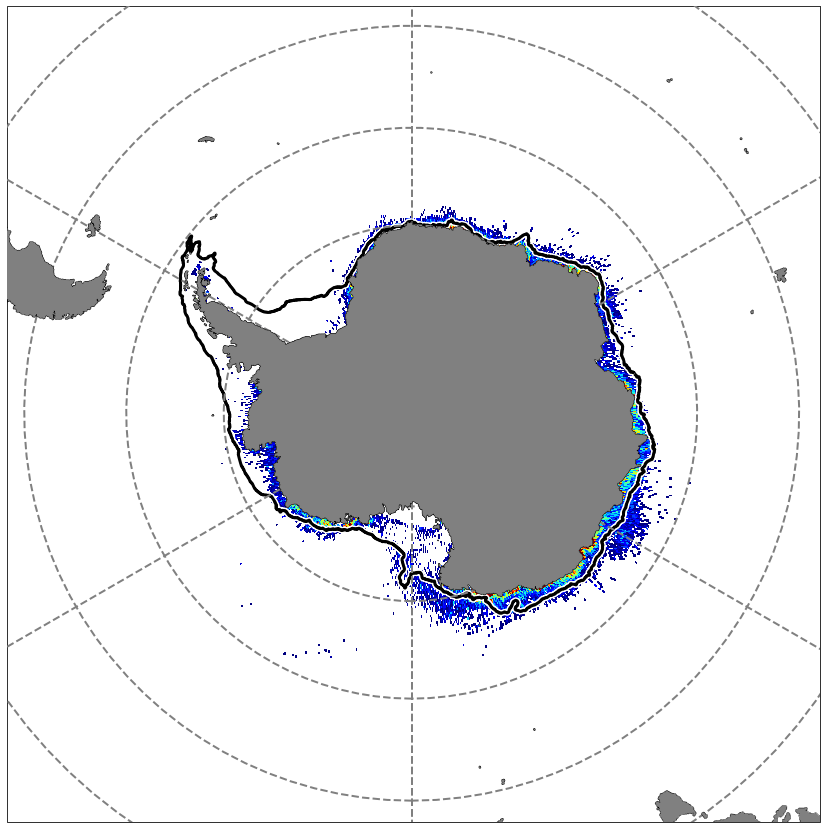

In [16]:
cmin,cmax = 15,150
#npts_here = sum(AABW_shallower_than_EZD_plus_CDW)
fig = plt.figure(num=1,figsize=(15,15))
ax = plt.subplot(projection=ccrs.SouthPolarStereo())

c_min,c_max = cmin,cmax
levels = np.arange(cmin,cmax)

xbins,ybins=hist2d_pts_1[1:]

ffmsk = hist2d_pts.T

#ffmsk[ffmsk<(0.5/1000)*sum(CDW_inds)] = np.nan
ffmsk[ffmsk<cmin] = np.nan

plt.pcolormesh(xbins,ybins,ffmsk,cmap='jet',vmax=c_max,vmin=c_min,zorder=5,
              transform=ccrs.PlateCarree())

# Isobath and background
X,Y = np.meshgrid(xt_ocean,yt_extend)
ax.contourf(X,Y,np.ma.masked_greater(ocean_depth_extend,0),colors='gray',zorder=11,transform=ccrs.PlateCarree()) #Land Mask cmap=cmap_ice
ax.contour(X, Y,ocean_depth_extend,[1],colors='black',linewidths=0.5,zorder=12,transform=ccrs.PlateCarree()) #isoheight of ocean

ax.set_extent([-180, 180, -90, -48], ccrs.PlateCarree())
#Add 1000m isobath
contour =ax.contour(xt_ocean_cc, yt_ocean_cc, shelf_mask.values, [0, 1], colors = 'white', transform=ccrs.PlateCarree(),zorder=6,linewidths=6)
contour2 = ax.contour(xt_ocean_cc, yt_ocean_cc, shelf_mask.values, [0, 1], colors = 'k', transform=ccrs.PlateCarree(),zorder=7,linewidths=3)

# Add contour for specific region
xt_ocean_cc_1 = np.copy(xt_ocean_cc)
xt_ocean_cc_1[xt_ocean_cc_1<0] += 360


# Add grid lines
ax.gridlines(draw_labels=False, linewidth=2, color='gray', alpha=1, linestyle='--',transform=ccrs.PlateCarree(),zorder=10)

#
#plt.title(title)
plt.savefig('Revision_Figure_2_b_'+str_days_threshold+'_consecutive_days_Cbar_Range_'+str(cmin)+'_'+str(cmax)+'.png',format='png',dpi=300)
plt.show()

# Unadopted plot for the time series of how many days particles identified as AABW were in the consecutive euphotic zone residence 

In [12]:
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_1_datetime.npz',allow_pickle=True)
var_in_arrs_1['datetime']   =npzfile['datetime']

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_2_datetime_6hr.npz',allow_pickle=True)
var_in_arrs_2['datetime']   =npzfile['datetime']

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_3_datetime_6hr.npz',allow_pickle=True)
var_in_arrs_3['datetime']   =npzfile['datetime']

In [13]:
dt_array1 = var_in_arrs_1['datetime']
dt_array2 = var_in_arrs_2['datetime']
dt_array3 = var_in_arrs_3['datetime']

In [14]:
days_threshold = 0
days_threshold = days_threshold*4

timeseries = []
npts = []

for yyyy in np.arange(1995,2006):
    for mm in np.arange(1,13):
        timeseries.append(dt.datetime(yyyy,mm,15))
        
        if yyyy<2005:
            if mm<12:
                
                tar_arr  = PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy,mm+1,1,0,0))]
            elif mm==12:
                tar_arr  = PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy+1,1,1,0,0))]
            npts.append(np.nansum(np.nansum(tar_arr>days_threshold,axis=1)>0))
            
        if yyyy == 2005:
            if mm==1:
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr1 =  PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr3 =  PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy,mm+1,1,0,0))]
                npts.append(np.nansum(np.nansum(tar_arr1>0,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr3>days_threshold,axis=1)>0))
            elif (mm<12) & (mm>1):
                tar_arr1  = PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy,mm+1,1,0,0))]
                npts.append(np.nansum(np.nansum(tar_arr1>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0))
            elif mm==12:
                tar_arr1  = PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy+1,1,1,0,0))]
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy+1,1,1,0,0))]
                npts.append(np.nansum(np.nansum(tar_arr1>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0))
            

In [15]:
days_threshold = 7
days_threshold = days_threshold*4
ind_here = CDW_inds
timeseries = []
npts_7 = []

for yyyy in np.arange(1995,2006):
    for mm in np.arange(1,13):
        timeseries.append(dt.datetime(yyyy,mm,15))
        
        if yyyy<2005:
            if mm<12:
                
                tar_arr  = PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy,mm+1,1,0,0))]
            elif mm==12:
                tar_arr  = PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy+1,1,1,0,0))]
            npts_7.append(np.nansum(np.nansum(tar_arr>days_threshold,axis=1)>0))
            
        if yyyy == 2005:
            if mm==1:
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr1 =  PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr3 =  PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy,mm+1,1,0,0))]
                npts_7.append(np.nansum(np.nansum(tar_arr1>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr3>days_threshold,axis=1)>0))
            elif (mm<12) & (mm>1):
                tar_arr1  = PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy,mm+1,1,0,0))]
                npts_7.append(np.nansum(np.nansum(tar_arr1>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0))
            elif mm==12:
                tar_arr1  = PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy+1,1,1,0,0))]
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy+1,1,1,0,0))]
                npts_7.append(np.nansum(np.nansum(tar_arr1>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0))
            

In [16]:
days_threshold = 14
days_threshold = days_threshold*4
ind_here = CDW_inds
timeseries = []
npts_14 = []

for yyyy in np.arange(1995,2006):
    for mm in np.arange(1,13):
        timeseries.append(dt.datetime(yyyy,mm,15))
        
        if yyyy<2005:
            if mm<12:
                
                tar_arr  = PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy,mm+1,1,0,0))]
            elif mm==12:
                tar_arr  = PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy+1,1,1,0,0))]
            npts_14.append(np.nansum(np.nansum(tar_arr>days_threshold,axis=1)>0))
            
        if yyyy == 2005:
            if mm==1:
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr1 =  PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr3 =  PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy,mm+1,1,0,0))]
                npts_14.append(np.nansum(np.nansum(tar_arr1>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr3>days_threshold,axis=1)>0))
            elif (mm<12) & (mm>1):
                tar_arr1  = PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy,mm+1,1,0,0))]
                npts_14.append(np.nansum(np.nansum(tar_arr1>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0))
            elif mm==12:
                tar_arr1  = PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy+1,1,1,0,0))]
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy+1,1,1,0,0))]
                npts_14.append(np.nansum(np.nansum(tar_arr1>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0))
            

In [17]:
days_threshold = 21
days_threshold = days_threshold*4
ind_here = CDW_inds
timeseries = []
npts_21 = []

for yyyy in np.arange(1995,2006):
    for mm in np.arange(1,13):
        timeseries.append(dt.datetime(yyyy,mm,15))
        
        if yyyy<2005:
            if mm<12:
                
                tar_arr  = PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy,mm+1,1,0,0))]
            elif mm==12:
                tar_arr  = PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy+1,1,1,0,0))]
            npts_21.append(np.nansum(np.nansum(tar_arr>days_threshold,axis=1)>0))
            
        if yyyy == 2005:
            if mm==1:
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr1 =  PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr3 =  PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy,mm+1,1,0,0))]
                npts_21.append(np.nansum(np.nansum(tar_arr1>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr3>days_threshold,axis=1)>0))
            elif (mm<12) & (mm>1):
                tar_arr1  = PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy,mm+1,1,0,0))]
                npts_21.append(np.nansum(np.nansum(tar_arr1>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0))
            elif mm==12:
                tar_arr1  = PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy+1,1,1,0,0))]
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy+1,1,1,0,0))]
                npts_21.append(np.nansum(np.nansum(tar_arr1>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0))
            

In [18]:
days_threshold = 28
days_threshold = days_threshold*4
ind_here = CDW_inds
timeseries = []
npts_28 = []

for yyyy in np.arange(1995,2006):
    for mm in np.arange(1,13):
        timeseries.append(dt.datetime(yyyy,mm,15))
        
        if yyyy<2005:
            if mm<12:
                
                tar_arr  = PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy,mm+1,1,0,0))]
            elif mm==12:
                tar_arr  = PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy+1,1,1,0,0))]
            npts_28.append(np.nansum(np.nansum(tar_arr>days_threshold,axis=1)>0))
            
        if yyyy == 2005:
            if mm==1:
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr1 =  PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr3 =  PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy,mm+1,1,0,0))]
                npts_28.append(np.nansum(np.nansum(tar_arr1>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr3>days_threshold,axis=1)>0))
            elif (mm<12) & (mm>1):
                tar_arr1  = PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy,mm+1,1,0,0))]
                npts_28.append(np.nansum(np.nansum(tar_arr1>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0))
            elif mm==12:
                tar_arr1  = PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy+1,1,1,0,0))]
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy+1,1,1,0,0))]
                npts_28.append(np.nansum(np.nansum(tar_arr1>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0))
            

In [19]:
days_threshold = 56
days_threshold = days_threshold*4
ind_here = CDW_inds
timeseries = []
npts_56 = []

for yyyy in np.arange(1995,2006):
    for mm in np.arange(1,13):
        timeseries.append(dt.datetime(yyyy,mm,15))
        
        if yyyy<2005:
            if mm<12:
                
                tar_arr  = PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy,mm+1,1,0,0))]
            elif mm==12:
                tar_arr  = PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy+1,1,1,0,0))]
            npts_56.append(np.nansum(np.nansum(tar_arr>days_threshold,axis=1)>0))
            
        if yyyy == 2005:
            if mm==1:
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr1 =  PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr3 =  PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy,mm+1,1,0,0))]
                npts_56.append(np.nansum(np.nansum(tar_arr1>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr3>days_threshold,axis=1)>0))
            elif (mm<12) & (mm>1):
                tar_arr1  = PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy,mm+1,1,0,0))]
                npts_56.append(np.nansum(np.nansum(tar_arr1>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0))
            elif mm==12:
                tar_arr1  = PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy+1,1,1,0,0))]
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy+1,1,1,0,0))]
                npts_56.append(np.nansum(np.nansum(tar_arr1>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0))
            

In [20]:
days_threshold = 112
days_threshold = days_threshold*4
ind_here = CDW_inds
timeseries = []
npts_112 = []

for yyyy in np.arange(1995,2006):
    for mm in np.arange(1,13):
        timeseries.append(dt.datetime(yyyy,mm,15))
        
        if yyyy<2005:
            if mm<12:
                
                tar_arr  = PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy,mm+1,1,0,0))]
            elif mm==12:
                tar_arr  = PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy+1,1,1,0,0))]
            npts_112.append(np.nansum(np.nansum(tar_arr>days_threshold,axis=1)>0))
            
        if yyyy == 2005:
            if mm==1:
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr1 =  PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr3 =  PARZ_mask_3[:,(dt_array3>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array3<dt.datetime(yyyy,mm+1,1,0,0))]
                npts_112.append(np.nansum(np.nansum(tar_arr1>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr3>days_threshold,axis=1)>0))
            elif (mm<12) & (mm>1):
                tar_arr1  = PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy,mm+1,1,0,0))]
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy,mm+1,1,0,0))]
                npts_112.append(np.nansum(np.nansum(tar_arr1>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0))
            elif mm==12:
                tar_arr1  = PARZ_mask_1[:,(dt_array1>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array1<dt.datetime(yyyy+1,1,1,0,0))]
                tar_arr2  = PARZ_mask_2[:,(dt_array2>=dt.datetime(yyyy,mm,1,0,0)) & (dt_array2<dt.datetime(yyyy+1,1,1,0,0))]
                npts_112.append(np.nansum(np.nansum(tar_arr1>days_threshold,axis=1)>0)+
                           np.nansum(np.nansum(tar_arr2>days_threshold,axis=1)>0))
            

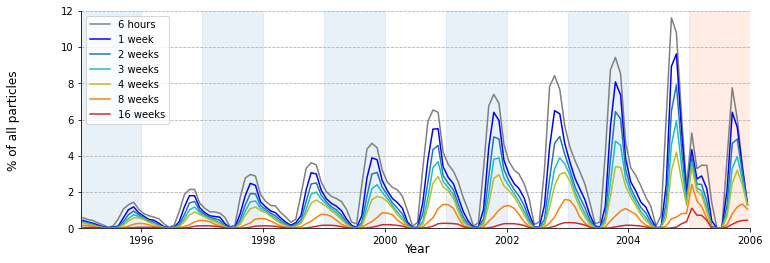

In [21]:
# Define the x ranges for each subplot
xlims = [(dt.datetime(1969,1,1), dt.datetime(1995,1,1)), (dt.datetime(1995,1,1), dt.datetime(2007,1,1)), (dt.datetime(2007,1,1), dt.datetime(2019,1,1))]
all_npts= sum(CDW_inds)
# Create a 3x1 subplot grid
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,4), gridspec_kw={"width_ratios": [1], "height_ratios": [1],"wspace": 0.0})

# Loop over the subplots and plot the data
ii=0
    
ax.plot(timeseries,100*np.array(npts)/all_npts,label='6 hours',color='C7')
ax.plot(timeseries,100*np.array(npts_7)/all_npts,label='1 week',color='b')
ax.plot(timeseries,100*np.array(npts_14)/all_npts,label='2 weeks',color='C0')
ax.plot(timeseries,100*np.array(npts_21)/all_npts,label='3 weeks',color='C9')
ax.plot(timeseries,100*np.array(npts_28)/all_npts,label='4 weeks',color='C8')
ax.plot(timeseries,100*np.array(npts_56)/all_npts,label='8 weeks',color='C1')
ax.plot(timeseries,100*np.array(npts_112)/all_npts,label='16 weeks',color='C3')

ax.set_ylim([0,12])
ax.grid(axis='y', linestyle='--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax.legend(loc='upper left',fontsize=10)


# Plot the shaded range
start_date,end_date = dt.datetime(1995, 1, 1),dt.datetime(2005, 1, 1)
# Calculate the number of years between the start and end dates
num_years = (end_date.year - start_date.year) + 1
# Create the numpy array of dates
dates_array = np.array([dt.datetime(year, 1, 1) for year in range(start_date.year, start_date.year + num_years, 1)], dtype='datetime64')
for iii in [0,2,4,6,8]:
    ax.fill_between([dates_array[iii],dates_array[iii+1]], [0,0],[1000000,1000000], alpha=0.1,zorder=0,color='C0') 
ax.fill_between([dt.datetime(2005, 1, 1),dt.datetime(2006, 1, 1)], [0,0],[1000000,1000000], alpha=0.1,zorder=0,color='orangered')

ax.set_xlim((dt.datetime(1995,1,1), dt.datetime(2006,1,1)))

# Add overall title and axis labels
#fig.suptitle('Euphotic zone residence time increasing')
fig.text(0.5, 0.04, 'Year',fontsize=12)
fig.text(0.04, 0.5, '% of all particles', va='center', rotation='vertical',fontsize=12)
plt.savefig('Unadopted_Figure_Time_series_consecutive_durations.png',dpi=500)
# Adjust spacing between subplots
#fig.subplots_adjust(0.1, right=1, bottom=0.15, top=0.85, wspace=0.03)